Best Parameters: {'epochs': 175, 'hidden_layers': [100, 50, 20], 'learning_rate': 0.009, 'mini_batch_size': 42}
Best Score: 0.02364311025484696

Be aware we used KERAS

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks  
import matplotlib.pyplot as plt

In [28]:
features = ["Exposure","VehPower","VehAge","DrivAge","BonusMalus","Density","VehBrand_B12","VehGas_Regular"]

df_train = pd.read_csv(R"data\final_train_data.csv")
df_test = pd.read_csv(R"data\processed_test_data.csv")
X_train = df_train[features]
y_train = df_train['ClaimNb']
X_test = df_test.drop(columns=['ClaimNb'])
y_test = df_test["ClaimNb"]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test


,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,VehBrand_B12,VehGas_Regular
0,1.00,5,8,46,50,4116,0,1
1,0.24,4,10,46,64,1329,0,1
2,0.41,4,0,32,72,377,1,1
3,0.07,5,4,57,50,251,0,0
4,0.06,4,10,45,50,94,0,1
...,...,...,...,...,...,...,...,...
135368,0.35,10,6,57,85,879,1,0
135369,0.87,10,10,46,56,1609,0,0
135370,1.00,8,8,35,50,3744,0,1
135371,0.50,11,1,32,54,6485,1,1


In [ ]:
"""
KEras model using LeakyRely, He init, early stopping with patience of 20, SGD with lr=0.009, momentum=0.0
We have 3 hidden layers with 100,50,20 neurons respectively.
Output layer is linear activation.
"""




model = models.Sequential([

    layers.Dense(100, kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    layers.LeakyReLU(alpha=0.2), 
    

    layers.Dense(50, kernel_initializer='he_normal'),
    layers.LeakyReLU(alpha=0.02),
    

    layers.Dense(20, kernel_initializer='he_normal'),
    layers.LeakyReLU(alpha=0.02),
    

    layers.Dense(1, activation='linear')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=0.009, momentum=0.0)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


# n_iter_no_change=20 in sklearn is 'patience=20' in Keras
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

c:\Users\Simon\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Simon\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.15, 
    epochs=175,
    batch_size=42,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0592 - mae: 0.1064 - val_loss: 0.0574 - val_mae: 0.1026
Epoch 2/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0561 - mae: 0.0994 - val_loss: 0.0572 - val_mae: 0.1071
Epoch 3/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0560 - mae: 0.0991 - val_loss: 0.0572 - val_mae: 0.1101
Epoch 4/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0559 - mae: 0.0991 - val_loss: 0.0579 - val_mae: 0.1258
Epoch 5/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0559 - mae: 0.0990 - val_loss: 0.0571 - val_mae: 0.0997
Epoch 6/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0558 - mae: 0.0989 - val_loss: 0.0570 - val_mae: 0.1027
Epoch 7/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0558 - mae: 0.0989 - val_loss: 0.0571 - val_mae: 0.1088
Epoch 8/175
10958/10958 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0558 - mae: 0.0988 - val_loss: 0.0573 - val_mae: 0.1156
Epoch 9/

In [17]:
y_pred_raw = model.predict(X_test_scaled)

4231/4231 ━━━━━━━━━━━━━━━━━━━━ 2s 567us/step


In [18]:
y_pred = y_pred_raw.flatten()
y_test

0         0
1         0
2         0
3         0
4         0
         ..
135368    0
135369    0
135370    0
135371    0
135372    0
Name: ClaimNb, Length: 135373, dtype: int64

In [19]:
score = r2_score(y_test, y_pred)

print(f"Model R^2 Score: {score:.4f}")

Model R^2 Score: 0.0290


In [ ]:
df_train = pd.read_csv(R"data\final_train_data.csv")
df_test = pd.read_csv(R"data\processed_test_data.csv")
X = df_train[features]
y = df_train['ClaimNb']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)




In [21]:
train_mse = history.history['loss']
val_mse = history.history['val_loss']

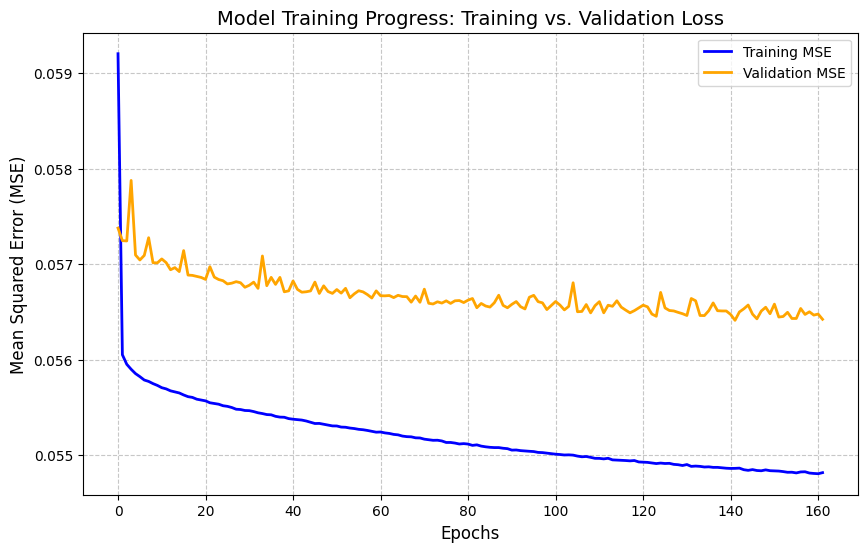

In [ ]:
"""" 
Plot to visaluize training and validation loss over epochs, to see how it behaves and if its similar to ours
"""
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE', color='blue', linewidth=2)
plt.plot(val_mse, label='Validation MSE', color='orange', linewidth=2)


plt.title('Model Training Progress: Training vs. Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()